# Pre processing of Doom frames

In this notebook we will explore the pre-processing of frames (images) obtained through the doom engnine

Let's start importing some useful libraries

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
import random
import time

from matplotlib.colors import NoNorm
from vizdoom import *

We will need to create a new game environment first

In [20]:
game = DoomGame()
game.load_config("basic.cfg")
game.init()

In [21]:
shoot = [0, 0, 1]
left = [1, 0, 0]
right = [0, 1, 0]
actions = [shoot, left, right]

And to initialize a new episode

In [22]:
game.new_episode()
state = game.get_state()

Now we can retireve and visualize one screen frame

In [23]:
img = state.screen_buffer
# Transpose the image to make it compatible with imshow
img = np.transpose(img, (1, 2, 0))
print ("\t img:", img.shape)

('\t img:', (240, 320, 3))


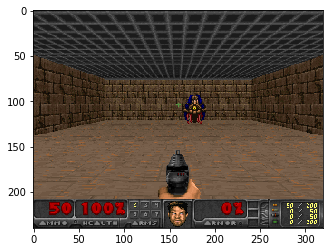

In [24]:
plt.imshow(img)

The first step is removing useless colors, thus reducing the dimension of the input data to 1/3. There are two commonly used methods for this, let's see the alternatives.

In [25]:
img_g_mean = (img.mean(axis=-1,keepdims=1)).squeeze()
img_g_skimage = skimage.color.colorconv.rgb2gray(img)

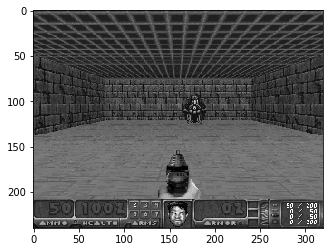

In [26]:
plt.imshow(img_g_mean, cmap='gray')

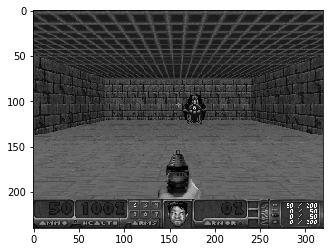

In [27]:
plt.imshow(img_g_skimage, cmap='gray')

Given the difference in color representation (the skimage library uses the `luminance` method), let's do some benchmarking

In [28]:
%%time
for i in range(1000):
    img_g_mean = (img.mean(axis=-1,keepdims=1)).squeeze()

CPU times: user 354 ms, sys: 3.91 ms, total: 358 ms
Wall time: 361 ms


In [29]:
%%time
for i in range(1000):
    img_g_skimage = skimage.color.colorconv.rgb2gray(img)

CPU times: user 395 ms, sys: 4.61 ms, total: 400 ms
Wall time: 401 ms


The pure numpy method is way (5x) faster (and more aestetically pleasing), so we will use that

Now let's crop the image to remove some of the roof and the lower padding

('\t cropped frame:', (200, 300))


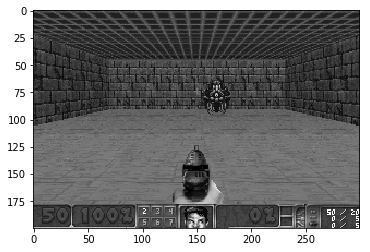

In [30]:
cropped_frame = img_g_mean[30:-10,10:-10]
print ("\t cropped frame:", cropped_frame.shape)
plt.imshow(cropped_frame, cmap='gray')

Then we can proceed to normalize the pixel values

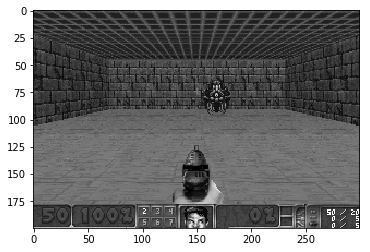

In [31]:
normalized_frame = cropped_frame/255.0
plt.imshow(normalized_frame, cmap='gray')

And resize the final image to a square matrix

In [32]:
from  skimage import transform

('\t resized:', (128, 128))


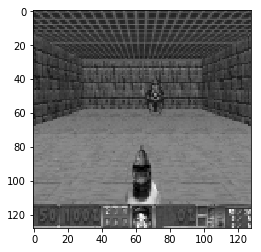

In [33]:
resized = transform.resize(normalized_frame, [128, 128], anti_aliasing=True, mode='reflect')
print ("\t resized:", resized.shape)
plt.imshow(resized, cmap='gray')

### Function

We can now create a single function to do the work

In [34]:
def preproc_frame(frame):
    return skimage.transform.resize(
        ((frame.mean(axis=-1,keepdims=1)).squeeze()[30:-10,10:-10])/255.0,
        [128, 128], 
        anti_aliasing=True,
        mode='reflect'
    )

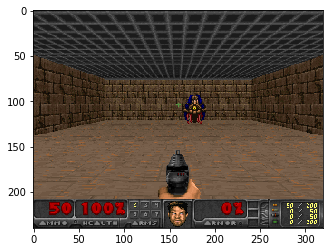

In [35]:
plt.imshow(img, cmap='gray')

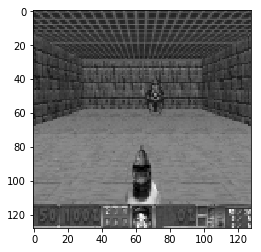

In [36]:
plt.imshow(preproc_frame(img), cmap='gray')